# Artificial intelligence models to classify Legendary Pokemons

These notebooks aim to find the pokemons closest to being legendary.

## Packages

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sqlalchemy import create_engine
from xgboost import XGBClassifier
from xgboost import plot_importance

%matplotlib inline

## Load Dataset

In [2]:
df =  pd.read_csv('../Data/pokemon_data.csv')

## Dataset overview

In [3]:
df.shape

(801, 52)

In [4]:
df.head(3)

Unnamed: 0                    abilities  against_bug  against_dark  \
0           0  ['Overgrow', 'Chlorophyll']          1.0           1.0   
1           1  ['Overgrow', 'Chlorophyll']          1.0           1.0   
2           2  ['Overgrow', 'Chlorophyll']          1.0           1.0   

   against_dragon  against_electric  against_fairy  against_fight  \
0             1.0               0.5            0.5            0.5   
1             1.0               0.5            0.5            0.5   
2             1.0               0.5            0.5            0.5   

   against_fire  against_flying  ...  id  type1_id  type2_id  ability1  \
0           2.0             2.0  ...   0         1         6       121   
1           2.0             2.0  ...   1         1         6       121   
2           2.0             2.0  ...   2         1         6       121   

   ability2  ability3  ability4  ability5  ability6  abilities_number  
0        20         0         0         0         0                 2  
1        20         0         0         0         0                 2  
2        20         0         0         0         0                 2  

[3 rows x 52 columns]

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.head(3)

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   

   against_flying  against_ghost  ...  id  type1_id  type2_id  ability1  \
0             2.0            1.0  ...   0         1         6       121   
1             2.0            1.0  ...   1         1         6       121   
2             2.0            1.0  ...   2         1         6       121   

   ability2  ability3  ability4  ability5  ability6  abilities_number  
0        20         0         0         0         0                 2  
1        20         0         0         0         0                 2  
2        20         0         0         0         0                 2  

[3 rows x 51 columns]

In [7]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary', 'id', 'type1_id', 'type2_id', 'ability1',
       'ability2', 'ability3', 'ability4', 'ability5', 'ability6',
       'abilities_number'],
      dtype='object')

In [8]:
df.isna().sum(axis=0)

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male        0
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg              0
generation             0


In [9]:
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [10]:
df['capture_rate'][773]

'30 (Meteorite)255 (Core)'

In [11]:
df['capture_rate'][773] = 30 

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df['capture_rate'] = pd.to_numeric(df['capture_rate'])

In [13]:
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate           int64
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [14]:
numeric_columns = df.select_dtypes(['int64', 'float64']).columns.tolist()

In [15]:
df_num = df[numeric_columns]

In [16]:
df_num.describe()

against_bug  against_dark  against_dragon  against_electric  \
count   801.000000    801.000000      801.000000        801.000000   
mean      0.996255      1.057116        0.968789          1.073970   
std       0.597248      0.438142        0.353058          0.654962   
min       0.250000      0.250000        0.000000          0.000000   
25%       0.500000      1.000000        1.000000          0.500000   
50%       1.000000      1.000000        1.000000          1.000000   
75%       1.000000      1.000000        1.000000          1.000000   
max       4.000000      4.000000        2.000000          4.000000   

       against_fairy  against_fight  against_fire  against_flying  \
count     801.000000     801.000000    801.000000      801.000000   
mean        1.068976       1.065543      1.135456        1.192884   
std         0.522167       0.717251      0.691853        0.604488   
min         0.250000       0.000000      0.250000        0.250000   
25%         1.000000       0.500000      0.500000        1.000000   
50%         1.000000       1.000000      1.000000        1.000000   
75%         1.000000       1.000000      2.000000        1.000000   
max         4.000000       4.000000      4.000000        4.000000   

       against_ghost  against_grass  ...          id    type1_id    type2_id  \
count     801.000000     801.000000  ...  801.000000  801.000000  801.000000   
mean        0.985019       1.034020  ...  400.000000    7.024969    5.918851   
std         0.558256       0.788896  ...  231.373075    4.782716    6.910474   
min         0.000000       0.250000  ...    0.000000    1.000000    0.000000   
25%         1.000000       0.500000  ...  200.000000    3.000000    0.000000   
50%         1.000000       1.000000  ...  400.000000    5.000000    1.000000   
75%         1.000000       1.000000  ...  600.000000   11.000000   11.000000   
max         4.000000       4.000000  ...  800.000000   18.000000   18.000000   

         ability1    ability2    ability3    ability4    ability5    ability6  \
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.000000   
mean   115.480649  106.365793   67.464419    2.725343    2.428215    2.124844   
std     62.484378   70.161954   77.257857   18.546684   20.478041   17.528887   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     73.000000   43.000000    0.000000    0.000000    0.000000    0.000000   
50%    119.000000  109.000000   27.000000    0.000000    0.000000    0.000000   
75%    172.000000  164.000000  139.000000    0.000000    0.000000    0.000000   
max    226.000000  227.000000  226.000000  172.000000  216.000000  203.000000   

       abilities_number  
count        801.000000  
mean           2.479401  
std            0.857256  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            3.000000  
max            6.000000  

[8 rows x 45 columns]

In [17]:
df_num.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'percentage_male',
       'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'weight_kg',
       'generation', 'is_legendary', 'id', 'type1_id', 'type2_id', 'ability1',
       'ability2', 'ability3', 'ability4', 'ability5', 'ability6',
       'abilities_number'],
      dtype='object')

In [18]:
print("Int and float colums: %s" %str(df_num.shape[1]))

Int and float colums: 45


## Features Analysis

In [19]:
X = df_num.drop(['is_legendary', 'pokedex_number', 'id'], axis=1)
y = df_num['is_legendary']

In [20]:
X.shape

(801, 42)

In [21]:
feactures_list = []

### XGBoost

In [22]:
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

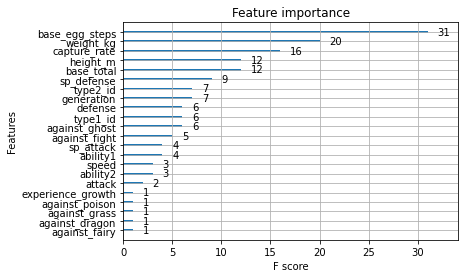

In [23]:
plot_importance(model)
plt.show()

### Sklearn and XGBoost

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = np.sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
 
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
 
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, Accuracy: 98.76%
Thresh=0.000, n=42, A

In [25]:
feactures_list.append(['base_egg_steps', 'capture_rate', 'base_total', 'generation', 'against_ghost', 'attack', 'against_fight'])

### Sklearn

#### Features with low variance

In [26]:
from sklearn.feature_selection import VarianceThreshold

In [27]:
def variance_threshold_selector(data, threshold=(.8 * (1 - .8))):
  selector = VarianceThreshold(threshold)
  selector.fit(data)
  return data[data.columns[selector.get_support(indices=True)]]

In [28]:
data = variance_threshold_selector(X)
data.shape

(801, 40)

In [29]:
data = variance_threshold_selector(X, threshold=0.8)
data.shape

(801, 23)

In [30]:
data.columns

Index(['attack', 'base_egg_steps', 'base_happiness', 'base_total',
       'capture_rate', 'defense', 'experience_growth', 'height_m', 'hp',
       'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'weight_kg',
       'generation', 'type1_id', 'type2_id', 'ability1', 'ability2',
       'ability3', 'ability4', 'ability5', 'ability6'],
      dtype='object')

In [31]:
feactures_list.append(data.columns.to_list())

In [32]:
variance_threshold_selector(X, threshold=0.9).shape

(801, 23)

#### Univariate feature

In [33]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

In [34]:
def selectKbest_threshold_selector(X, y, method, k=7):
  selector = SelectKBest(method, k=k)
  selector.fit(X, y)
  return X[X.columns[selector.get_support(indices=True)]]

In [35]:
data = selectKbest_threshold_selector(X, y, chi2)
data.columns

Index(['base_egg_steps', 'base_total', 'capture_rate', 'experience_growth',
       'weight_kg', 'ability2', 'ability3'],
      dtype='object')

In [36]:
feactures_list.append(data.columns.to_list())

In [37]:
data = selectKbest_threshold_selector(X, y, f_classif)
data.columns

Index(['base_egg_steps', 'base_happiness', 'base_total', 'experience_growth',
       'sp_attack', 'weight_kg', 'abilities_number'],
      dtype='object')

In [38]:
feactures_list.append(data.columns.to_list())

In [39]:
data = selectKbest_threshold_selector(X, y, mutual_info_classif)
data.columns

Index(['base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'experience_growth', 'percentage_male', 'ability1'],
      dtype='object')

In [40]:
feactures_list.append(data.columns.to_list())

### L1-based feature

In [41]:
from sklearn.svm import LinearSVC

In [42]:
def svm_selector(X, y, C=0.01):
  lsvc = LinearSVC(C=C, penalty="l1", dual=False).fit(X, y)
  model = SelectFromModel(lsvc, prefit=True)
  return X[X.columns[model.get_support(indices=True)]]

In [43]:
data = svm_selector(X,y)
data.shape

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(801, 15)

In [44]:
data.columns

Index(['base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'hp',
       'percentage_male', 'sp_defense', 'speed', 'weight_kg', 'type1_id',
       'type2_id', 'ability1', 'ability2', 'ability3', 'ability4'],
      dtype='object')

In [45]:
feactures_list.append(data.columns.to_list())

#### Tree-based feature

In [46]:
from sklearn.ensemble import ExtraTreesClassifier

In [47]:
def tree_selector(X, y, n_estimators=50):
  clf = ExtraTreesClassifier(n_estimators=n_estimators)
  clf = clf.fit(X, y)
  model = SelectFromModel(clf, prefit=True)
  return X[X.columns[model.get_support(indices=True)]]

In [48]:
tree_selector(X,y).columns

Index(['base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'experience_growth', 'percentage_male', 'weight_kg',
       'abilities_number'],
      dtype='object')

In [49]:
feactures_list.append(data.columns.to_list())

##  IA Models

### XGBClassifier

In [50]:
for feactures in feactures_list:
  # Split Data
  X_train, X_test, y_train, y_test = train_test_split(X[feactures], y, test_size=0.3, random_state=7)
  
  # Model and Train
  model = XGBClassifier()
  model.fit(X_train, y_train)
  
  # make predictions for test data and evaluate
  y_pred = model.predict(X_test)
  predictions = [value for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)

  # Information
  print(f'Feactures: {feactures}')
  print(f'Feactures len: {len(feactures)}')
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print('\n')

Feactures: ['base_egg_steps', 'capture_rate', 'base_total', 'generation', 'against_ghost', 'attack', 'against_fight']
Feactures len: 7
Accuracy: 98.34%


Feactures: ['attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'defense', 'experience_growth', 'height_m', 'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation', 'type1_id', 'type2_id', 'ability1', 'ability2', 'ability3', 'ability4', 'ability5', 'ability6']
Feactures len: 23
Accuracy: 98.76%


Feactures: ['base_egg_steps', 'base_total', 'capture_rate', 'experience_growth', 'weight_kg', 'ability2', 'ability3']
Feactures len: 7
Accuracy: 98.76%


Feactures: ['base_egg_steps', 'base_happiness', 'base_total', 'experience_growth', 'sp_attack', 'weight_kg', 'abilities_number']
Feactures len: 7
Accuracy: 97.93%


Feactures: ['base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'experience_growth', 'percentage_male', 'ability1']
Feactures len: 7
Accuracy: 98.76%


Feacture

### Linear SVC

In [51]:
for feactures in feactures_list:
  # Split Data
  X_train, X_test, y_train, y_test = train_test_split(X[feactures], y, test_size=0.3, random_state=7)
  
  # Model and Train
  model = LinearSVC()
  model.fit(X_train, y_train)

  # make predictions for test data and evaluate
  y_pred = model.predict(X_test)
  predictions = [value for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)

  # Information
  print(f'Feactures: {feactures}')
  print(f'Feactures len: {len(feactures)}')
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print('\n')

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblin

Feactures: ['base_egg_steps', 'capture_rate', 'base_total', 'generation', 'against_ghost', 'attack', 'against_fight']
Feactures len: 7
Accuracy: 97.93%


Feactures: ['attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'defense', 'experience_growth', 'height_m', 'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation', 'type1_id', 'type2_id', 'ability1', 'ability2', 'ability3', 'ability4', 'ability5', 'ability6']
Feactures len: 23
Accuracy: 95.44%


Feactures: ['base_egg_steps', 'base_total', 'capture_rate', 'experience_growth', 'weight_kg', 'ability2', 'ability3']
Feactures len: 7
Accuracy: 96.68%


Feactures: ['base_egg_steps', 'base_happiness', 'base_total', 'experience_growth', 'sp_attack', 'weight_kg', 'abilities_number']
Feactures len: 7
Accuracy: 96.68%


Feactures: ['base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'experience_growth', 'percentage_male', 'ability1']
Feactures len: 7
Accuracy: 89.63%


Feacture

### ExtraTreesClassifier

In [52]:
from sklearn import tree

In [53]:
for feactures in feactures_list:
  # Split Data
  X_train, X_test, y_train, y_test = train_test_split( X[feactures], y, test_size=0.3, random_state=3)
  
  # Model and Train
  clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
  clf.fit(X_train, y_train)

  # make predictions for test data and evaluate
  y_pred = clf.predict(X_test)
  predictions = [value for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)

  # Information
  print(f'Feactures: {feactures}')
  print(f'Feactures len: {len(feactures)}')
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print('\n')

Feactures: ['base_egg_steps', 'capture_rate', 'base_total', 'generation', 'against_ghost', 'attack', 'against_fight']
Feactures len: 7
Accuracy: 100.00%


Feactures: ['attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'defense', 'experience_growth', 'height_m', 'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation', 'type1_id', 'type2_id', 'ability1', 'ability2', 'ability3', 'ability4', 'ability5', 'ability6']
Feactures len: 23
Accuracy: 99.59%


Feactures: ['base_egg_steps', 'base_total', 'capture_rate', 'experience_growth', 'weight_kg', 'ability2', 'ability3']
Feactures len: 7
Accuracy: 100.00%


Feactures: ['base_egg_steps', 'base_happiness', 'base_total', 'experience_growth', 'sp_attack', 'weight_kg', 'abilities_number']
Feactures len: 7
Accuracy: 100.00%


Feactures: ['base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'experience_growth', 'percentage_male', 'ability1']
Feactures len: 7
Accuracy: 99.59%


Feact

### DecisionTreeClassifier

In [54]:
for feactures in feactures_list:
  # Split Data
  X_train, X_test, y_train, y_test = train_test_split( X[feactures], y, test_size=0.3, random_state=3)
  
  # Model and Train
  clf = tree.DecisionTreeClassifier()
  clf.fit(X_train, y_train)

  # make predictions for test data and evaluate
  y_pred = clf.predict(X_test)
  predictions = [value for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)

  # Information
  print(f'Feactures: {feactures}')
  print(f'Feactures len: {len(feactures)}')
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print('\n')

Feactures: ['base_egg_steps', 'capture_rate', 'base_total', 'generation', 'against_ghost', 'attack', 'against_fight']
Feactures len: 7
Accuracy: 100.00%


Feactures: ['attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'defense', 'experience_growth', 'height_m', 'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation', 'type1_id', 'type2_id', 'ability1', 'ability2', 'ability3', 'ability4', 'ability5', 'ability6']
Feactures len: 23
Accuracy: 100.00%


Feactures: ['base_egg_steps', 'base_total', 'capture_rate', 'experience_growth', 'weight_kg', 'ability2', 'ability3']
Feactures len: 7
Accuracy: 100.00%


Feactures: ['base_egg_steps', 'base_happiness', 'base_total', 'experience_growth', 'sp_attack', 'weight_kg', 'abilities_number']
Feactures len: 7
Accuracy: 99.17%


Feactures: ['base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'experience_growth', 'percentage_male', 'ability1']
Feactures len: 7
Accuracy: 100.00%


Feac

We can see that the best results are given with the 7 features models, as we found using XGBoost

To calculate the probabilities we will take the results obtained in the ExtraTreesClassifier, using the 7 features that gave us an accuarancy of 99.59%

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X[feactures_list[4]], y, test_size=0.3, random_state=3)
  
# Model and Train
clf = ExtraTreesClassifier(n_estimators=5, max_depth=3 ,random_state=1)
clf.fit(X_train, y_train)

# make predictions for test data and evaluate
probabilities = clf.predict_proba(X[feactures_list[4]])

In [56]:
clf.classes_

array([0, 1], dtype=int64)

In [90]:
probabilities

array([[0.97498148, 0.02501852],
       [0.97498148, 0.02501852],
       [0.97498148, 0.02501852],
       ...,
       [0.03795642, 0.96204358],
       [0.05334103, 0.94665897],
       [0.23664538, 0.76335462]])

In [113]:
legendary_probability = [ '%.2f' % (probability[1] * 100) for probability in probabilities]

In [101]:
indices = [i for i, x in enumerate(legendary_probability) if x > 60]

In [102]:
df.loc[indices]

abilities  against_bug  against_dark  against_dragon  \
143  ['Pressure', 'Snow Cloak']         0.50           1.0             1.0   
144      ['Pressure', 'Static']         0.50           1.0             1.0   
145  ['Pressure', 'Flame Body']         0.25           1.0             1.0   
149     ['Pressure', 'Unnerve']         2.00           2.0             1.0   
150             ['Synchronize']         2.00           2.0             1.0   
..                          ...          ...           ...             ...   
796             ['Beast Boost']         0.25           1.0             0.5   
797             ['Beast Boost']         1.00           1.0             0.5   
798             ['Beast Boost']         2.00           0.5             2.0   
799             ['Prism Armor']         2.00           2.0             1.0   
800              ['Soul-Heart']         0.25           0.5             0.0   

     against_electric  against_fairy  against_fight  against_fire  \
143               2.0            1.0            1.0           2.0   
144               1.0            1.0            0.5           1.0   
145               2.0            0.5            0.5           0.5   
149               1.0            1.0            0.5           1.0   
150               1.0            1.0            0.5           1.0   
..                ...            ...            ...           ...   
796               2.0            0.5            1.0           2.0   
797               0.5            0.5            2.0           4.0   
798               0.5            4.0            2.0           0.5   
799               1.0            1.0            0.5           1.0   
800               1.0            0.5            1.0           2.0   

     against_flying  against_ghost  ...   id  type1_id  type2_id  ability1  \
143             1.0            1.0  ...  143        14        18       133   
144             0.5            1.0  ...  144         7        18       133   
145             1.0            1.0  ...  145         2        18       133   
149             1.0            2.0  ...  149        11         0       133   
150             1.0            2.0  ...  150        11         0       197   
..              ...            ...  ...  ...       ...       ...       ...   
796             0.5            1.0  ...  796        17        18        14   
797             1.0            1.0  ...  797         1        17        14   
798             1.0            0.5  ...  798        16        15        14   
799             1.0            2.0  ...  799        11         0       134   
800             0.5            1.0  ...  800        17         9       175   

     ability2  ability3  ability4  ability5  ability6  abilities_number  
143       171         0         0         0         0                 2  
144       182         0         0         0         0                 2  
145        48         0         0         0         0                 2  
149       214         0         0         0         0                 2  
150         0         0         0         0         0                 1  
..        ...       ...       ...       ...       ...               ...  
796         0         0         0         0         0                 1  
797         0         0         0         0         0                 1  
798         0         0         0         0         0                 1  
799         0         0         0         0         0                 1  
800         0         0         0         0         0                 1  

[65 rows x 51 columns]

In [61]:
df[df['is_legendary'] == 1]

abilities  against_bug  against_dark  against_dragon  \
143  ['Pressure', 'Snow Cloak']         0.50           1.0             1.0   
144      ['Pressure', 'Static']         0.50           1.0             1.0   
145  ['Pressure', 'Flame Body']         0.25           1.0             1.0   
149     ['Pressure', 'Unnerve']         2.00           2.0             1.0   
150             ['Synchronize']         2.00           2.0             1.0   
..                          ...          ...           ...             ...   
796             ['Beast Boost']         0.25           1.0             0.5   
797             ['Beast Boost']         1.00           1.0             0.5   
798             ['Beast Boost']         2.00           0.5             2.0   
799             ['Prism Armor']         2.00           2.0             1.0   
800              ['Soul-Heart']         0.25           0.5             0.0   

     against_electric  against_fairy  against_fight  against_fire  \
143               2.0            1.0            1.0           2.0   
144               1.0            1.0            0.5           1.0   
145               2.0            0.5            0.5           0.5   
149               1.0            1.0            0.5           1.0   
150               1.0            1.0            0.5           1.0   
..                ...            ...            ...           ...   
796               2.0            0.5            1.0           2.0   
797               0.5            0.5            2.0           4.0   
798               0.5            4.0            2.0           0.5   
799               1.0            1.0            0.5           1.0   
800               1.0            0.5            1.0           2.0   

     against_flying  against_ghost  ...   id  type1_id  type2_id  ability1  \
143             1.0            1.0  ...  143        14        18       133   
144             0.5            1.0  ...  144         7        18       133   
145             1.0            1.0  ...  145         2        18       133   
149             1.0            2.0  ...  149        11         0       133   
150             1.0            2.0  ...  150        11         0       197   
..              ...            ...  ...  ...       ...       ...       ...   
796             0.5            1.0  ...  796        17        18        14   
797             1.0            1.0  ...  797         1        17        14   
798             1.0            0.5  ...  798        16        15        14   
799             1.0            2.0  ...  799        11         0       134   
800             0.5            1.0  ...  800        17         9       175   

     ability2  ability3  ability4  ability5  ability6  abilities_number  
143       171         0         0         0         0                 2  
144       182         0         0         0         0                 2  
145        48         0         0         0         0                 2  
149       214         0         0         0         0                 2  
150         0         0         0         0         0                 1  
..        ...       ...       ...       ...       ...               ...  
796         0         0         0         0         0                 1  
797         0         0         0         0         0                 1  
798         0         0         0         0         0                 1  
799         0         0         0         0         0                 1  
800         0         0         0         0         0                 1  

[70 rows x 51 columns]

## Submit Data

### Dw Connection

In [63]:
%run "DW_Connection.ipynb"

In [64]:
connection = database_connection()

In [75]:
engine = create_engine(f'postgresql://{connection["DB_USERNAME"]}:{connection["DB_PASSWORD"]}@{connection["DB_HOST"]}/{connection["DB_DATABASE"]}')

### Save Dataset

In [65]:
df_pokemon = pd.read_csv('../Data/pokemon_data_v1.csv')

In [69]:
df_pokemon.columns

Index(['id', 'name', 'hp', 'attack', 'sp_attack', 'experience_growth', 'type1',
       'type2', 'defense', 'sp_defense', 'description', 'image', 'generation',
       'pokedex_number', 'ability1', 'ability2', 'ability3', 'ability4',
       'ability5', 'ability6', 'abilities', 'legendary_percentage'],
      dtype='object')

In [67]:
len(legendary_probability)

801

In [114]:
legendary_probability[:10]

['2.50',
 '2.50',
 '2.50',
 '2.50',
 '2.50',
 '2.50',
 '2.26',
 '2.26',
 '2.26',
 '0.71']

In [115]:
df_pokemon['legendary_percentage'] = legendary_probability

In [116]:
df_pokemon.to_csv('../Data/pokemon_data_v1.csv', index=False)

### Create and Update Tables

In [117]:
df_pokemon.to_sql('POKEMONS', con=engine, if_exists='replace', index=False)

In [118]:
# Set PRIMARY KEY
with engine.connect() as connection:
    connection.execute('ALTER TABLE public."POKEMONS" ADD CONSTRAINT pk_pokemons PRIMARY KEY (id);')

In [119]:
foreign_keys = []
foreign_keys += ['type1', 'type2']
foreign_keys

['type1', 'type2']

In [120]:
def set_fk_sql(name):
    sql = f'''
        ALTER TABLE public."POKEMONS" 
        ADD CONSTRAINT pokemon_{name} FOREIGN KEY ({name})
        REFERENCES public."POKEMON_ABILITIES" (id) MATCH SIMPLE
        ON UPDATE NO ACTION
        ON DELETE NO ACTION
        NOT VALID;
        CREATE INDEX fki_pokemon_{name}
        ON public."POKEMONS"({name});
        '''
    return sql

In [121]:
for fk in foreign_keys:
    sql = set_fk_sql(fk)
    with engine.connect() as connection:
        connection.execute(f'ALTER TABLE public."POKEMONS" DROP CONSTRAINT IF EXISTS pokemon_{fk};')
        connection.execute(sql)